<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-dataset" data-toc-modified-id="The-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The dataset</a></span><ul class="toc-item"><li><span><a href="#Research-the-variables" data-toc-modified-id="Research-the-variables-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Research the variables</a></span></li><li><span><a href="#Describe-the-panel" data-toc-modified-id="Describe-the-panel-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Describe the panel</a></span></li><li><span><a href="#Making-the-data-easy-to-work-with" data-toc-modified-id="Making-the-data-easy-to-work-with-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Making the data easy to work with</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Distribution-of-total-population-in-initial-time-period,-1958-1962" data-toc-modified-id="Distribution-of-total-population-in-initial-time-period,-1958-1962-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Distribution of total population in initial time period, 1958-1962</a></span></li><li><span><a href="#%-increase-in-population-by-country" data-toc-modified-id="%-increase-in-population-by-country-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>% increase in population by country</a></span><ul class="toc-item"><li><span><a href="#Slice-data-by-total_pop" data-toc-modified-id="Slice-data-by-total_pop-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Slice data by <code>total_pop</code></a></span></li><li><span><a href="#Calcuate-%-increase-by-country" data-toc-modified-id="Calcuate-%-increase-by-country-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Calcuate % increase by country</a></span></li><li><span><a href="#Visualize-%-increase-over-time-for-the-10-countries-with-largest-increase-in-population" data-toc-modified-id="Visualize-%-increase-over-time-for-the-10-countries-with-largest-increase-in-population-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visualize % increase over time for the 10 countries with largest increase in population</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Appendix</a></span></li></ul></div>

In [1]:
import os 
import sys
import datetime


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib as mpl
# Update matplotlib defaults to something nicer
mpl_update = {
    'font.size': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'figure.figsize': [12.0, 8.0],
    'axes.labelsize': 20,
    'axes.labelcolor': '#677385',
    'axes.titlesize': 20,
    'lines.color': '#0055A7',
    'lines.linewidth': 3,
    'text.color': '#677385',
    'font.family': 'sans-serif',
    'font.sans-serif': 'Tahoma'
}
mpl.rcParams.update(mpl_update)

In [3]:
# Create helper functions for specifying paths and appending
# directories with relevant python source code - for use within 
# Jupyter Notebooks in notebooks/ directory only.

# This is a lot at the top of your notebook but if you get the jupyter
# extension for collapsing headings, you can always have this and the
# imports collapsed

root_dir = os.curdir
max_nest = 10  # arbitrary, 3 would probably suffice
nest = 0
while "src" not in os.listdir(root_dir) and nest < max_nest:
    # Look up the directory structure for a src directory
    root_dir = os.path.join(os.pardir, root_dir)
    nest += 1

# If you don't find the src directory, the root directory is this directory
root_dir = os.path.abspath(root_dir) if nest < max_nest else os.path.abspath(
    os.curdir)

# Get the source directory and append path to access
# python packages/scripts within directory
if "src" in os.listdir(root_dir):
    src_dir = os.path.join(root_dir, "src")
    sys.path.append(src_dir)

# If data or figures directory don't exist in project directory,
# they will be saved to this directory
data_dir = os.path.join(
    root_dir, "data") if "data" in os.listdir(root_dir) else os.curdir
figure_dir = os.path.join(
    root_dir,
    "figures") if "figures" in os.listdir(root_dir) else os.curdir
models_dir = os.path.join(
    root_dir,
    "models") if "models" in os.listdir(root_dir) else os.curdir

# Prepends the directory path for specifying paths to data or figures
# dataplus("data.csv") -> "/Users/cmawer/project/data/data.csv"
# figplus("cool.png") -> "/Users/cmawer/project/figures/cool.png"
dataplus = lambda x: os.path.join(data_dir, x)
figplus = lambda x: os.path.join(figure_dir, x)
modelsplus = lambda x: os.path.join(models_dir, x)

# Prepends the date to a string (e.g. to save dated files)
# dateplus("cool-figure.png") -> "2018-12-05-cool-figure.png"
now = datetime.datetime.now().strftime("%Y-%m-%d")
dateplus = lambda x: "%s-%s" % (now, x)

# The dataset

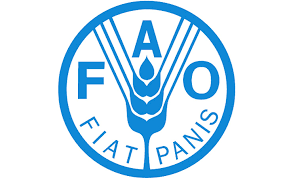

We will be using the [Food and Agriculture Organization](http://www.fao.org) (FAO) of the United Nation's AQUASTAT dataset. 

From FAO: 

FAO's three main goals are:
1. The eradication of hunger, food insecurity and malnutrition
2. The elimination of poverty and the driving forward of economic and social progress for all
3. The sustainable management and utilization of natural resources, including land, water, air, climate and genetic resources for the benefit of present and future generations. 

To support these goals, Article 1 of its constitution requires FAO to "collect, analyse, interpret and disseminate information related to nutrition, food and agriculture". Thus AQUASTAT started, with the aim to contribute to FAO's goals through the collection, analysis and dissemination of information related to water resources, water uses and agricultural water management, with an emphasis on countries in Africa, Asia, Latin America, and the Caribbean.

FAO offers data, metadata, reports, country profiles, river basin profiles, regional analyses, maps, tables, spatial data, guidelines, and other tools on:
* Water resources: internal, transboundary, total
* Water uses: by sector, by source, wastewater
* Irrigation: location, area, typology, technology, crops
* Dams: location, height, capacity, surface area
* Water-related institutions, policies and legistation

http://www.fao.org/nr/water/aquastat/data/query/index.html

In [4]:
data = pd.read_csv(dataplus('aquastat.csv.gzip'), compression='gzip')

In [5]:
data.head()

,country,region,variable,variable_full,time_period,year_measured,value
0,Afghanistan,World | Asia,total_area,Total area of the country (1000 ha),1958-1962,1962.0,65286.0
1,Afghanistan,World | Asia,total_area,Total area of the country (1000 ha),1963-1967,1967.0,65286.0
2,Afghanistan,World | Asia,total_area,Total area of the country (1000 ha),1968-1972,1972.0,65286.0
3,Afghanistan,World | Asia,total_area,Total area of the country (1000 ha),1973-1977,1977.0,65286.0
4,Afghanistan,World | Asia,total_area,Total area of the country (1000 ha),1978-1982,1982.0,65286.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143280 entries, 0 to 143279
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   country        143280 non-null  object 
 1   region         143280 non-null  object 
 2   variable       143280 non-null  object 
 3   variable_full  143280 non-null  object 
 4   time_period    143280 non-null  object 
 5   year_measured  96411 non-null   float64
 6   value          96411 non-null   float64
dtypes: float64(2), object(5)
memory usage: 7.7+ MB


## Research the variables

In [7]:
data_dictionary = data[['variable','variable_full']].drop_duplicates().set_index('variable')
data_dictionary

,variable_full
variable,
total_area,Total area of the country (1000 ha)
arable_land,Arable land area (1000 ha)
permanent_crop_area,Permanent crops area (1000 ha)
cultivated_area,Cultivated area (arable land + permanent crops...
percent_cultivated,% of total country area cultivated (%)
total_pop,Total population (1000 inhab)
rural_pop,Rural population (1000 inhab)
urban_pop,Urban population (1000 inhab)
gdp,Gross Domestic Product (GDP) (current US$)


## Describe the panel

In [8]:
data.country.nunique()

199

199 unique countries involved

In [9]:
countries = data.country.unique()

In [10]:
data.time_period.nunique()

12

For 12 time periods

In [11]:
time_periods = data.time_period.unique()
print(time_periods)

['1958-1962' '1963-1967' '1968-1972' '1973-1977' '1978-1982' '1983-1987'
 '1988-1992' '1993-1997' '1998-2002' '2003-2007' '2008-2012' '2013-2017']


## Making the data easy to work with

**Make your data [tidy](https://tomaugspurger.github.io/modern-5-tidy.html)**
1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table


**Ways to look at this data**

We can look at this data set in a number of ways: 
* Cross-section: all countries during a single time period
* Time-series: a single country over time 
* Panel data: all countries over time (as data is given)
* Geospatial: all countries in geographical relation to each other 

This notebook will focus on creating functions that can be used in future notebooks to look at the data in these different ways and to create some basic plots. 

# Data

# Distribution of total population in initial time period, 1958-1962

In [12]:
def slice_by_time(df, time_period):
    """For a `time_period`, creates a dataframe with a row for each country and a column for each AQUASTAT variable.

    Args:
        df: :obj:`pandas.DataFrame` with the columns, `country`, `variable`, `value`, and `time period`
        time_period: time period for filtering the data set and pivoting

    Returns:
        df (:obj:`pandas.DataFrame`): Pivoted dataframe

    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Provided argument `df` is not a Panda's DataFrame object")
        
    # Only take data for time period of interest
    df = df[df.time_period == time_period]

    # Pivot table
    df = df.pivot(index='country', columns='variable', values='value')

    df.columns.name = time_period

    return df

In [13]:
time_period = '1958-1962'

In [14]:
ts = slice_by_time(data, time_period)

In [15]:
ts.head()

1958-1962,accounted_flow,accounted_flow_border_rivers,agg_to_gdp,arable_land,avg_annual_rain_depth,avg_annual_rain_vol,cultivated_area,dam_capacity_per_capita,dependency_ratio,exploitable_irregular_renewable_surface,...,total_flow_border_rivers,total_pop,total_pop_access_drinking,total_renewable,total_renewable_groundwater,total_renewable_per_capita,total_renewable_surface,urban_pop,urban_pop_access_drinking,water_total_external_renewable
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,19.00,9.0,NaN,7700.0,327.0,213.5000,7760.0,128.40,28.7200,NaN,...,33.4,9344.00,NaN,65.3300,10.650,6992.0,55.68,804.90,NaN,18.18
Albania,3.30,0.0,NaN,436.0,1485.0,42.6900,487.0,NaN,10.9300,NaN,...,0.0,1738.00,NaN,30.2000,6.200,17376.0,26.35,533.20,NaN,3.30
Algeria,0.39,0.0,NaN,6300.0,89.0,212.0000,6900.0,89.99,3.5990,5.0,...,0.0,11690.00,NaN,11.6700,1.517,998.3,10.15,3934.00,NaN,0.42
Andorra,NaN,NaN,NaN,1.0,NaN,0.4724,1.0,NaN,NaN,NaN,...,NaN,15.38,NaN,0.3156,NaN,20520.0,NaN,9.76,NaN,NaN
Angola,0.40,0.0,NaN,2700.0,1010.0,1259.0000,3200.0,25.96,0.2695,NaN,...,0.0,5466.00,NaN,148.4000,58.000,27150.0,145.40,577.00,NaN,0.40


In [16]:
def plot_histogram(df,
                   column,
                   title=None,
                   xlabel=None,
                   ylabel=None,
                   label_size=20,
                   tick_label_size=16,
                   color='#0085ca',
                   alpha=0.8,
                   figsize=None,
                   logx=False,
                   logy=False,
                   bins=50,
                   **kwargs):

    if figsize is None:
        figsize = (12, 8)

    fig, ax = plt.subplots(figsize=figsize)

    if logx:
        if isinstance(bins, int):
            bins = np.logspace(np.log10(df[column].min()), np.log10(df[column].max()), num=bins)

        ax.set_xscale("log", base=10)
        
    if logy:
        ax.set_yscale("log", base=10)

    ax.hist(df[column], color=color, alpha=alpha, bins=bins, **kwargs)

    if xlabel is None:
        xlabel = ' '.join(column.split('_')).capitalize()
    if ylabel is None:
        ylabel = '# of countries'

    ax.set_xlabel(xlabel, size=label_size)
    ax.set_ylabel(ylabel, size=label_size)

    if title:
        ax.set_title(title, size=label_size)

    return fig, ax

In [17]:
variable = 'total_pop'
variable_name = data_dictionary.loc[variable, 'variable_full']

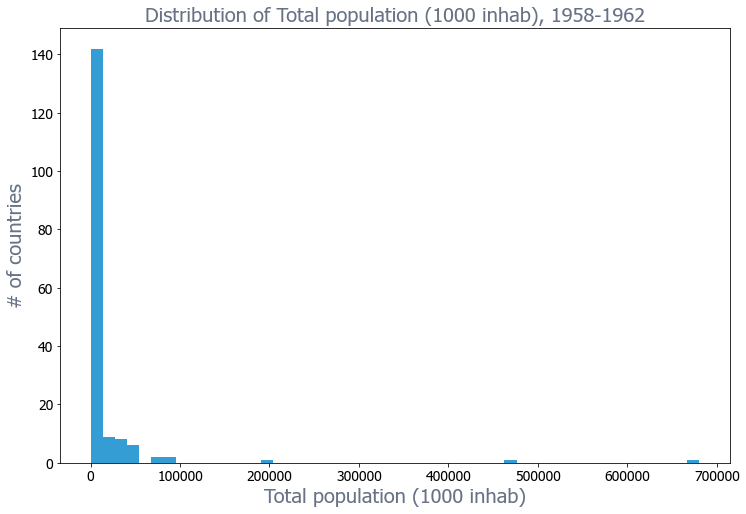

In [18]:
fig, ax = plot_histogram(
    ts,
    variable,
    xlabel=variable_name,
    title='Distribution of %s, %s' % (variable_name, time_period))

Data is very skewed... try a log10 for the y values

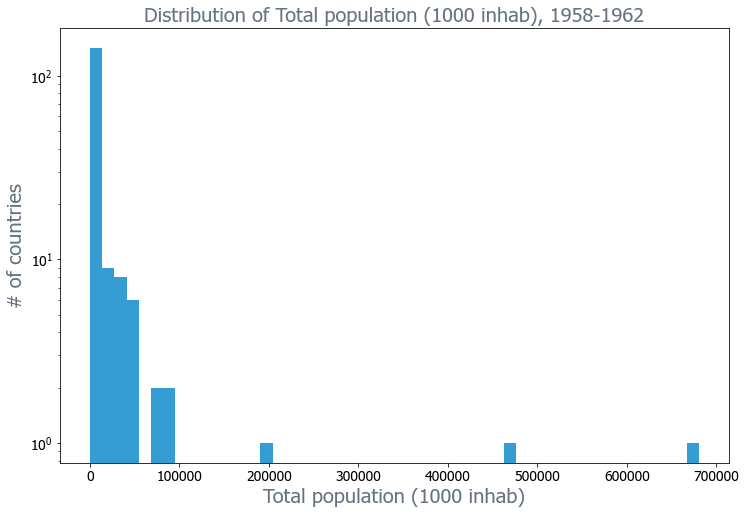

In [19]:
fig, ax = plot_histogram(
    ts,
    variable,
    logy=True,
    xlabel=variable_name,
    title='Distribution of %s, %s' % (variable_name, time_period))

Try a log10 x distribution..

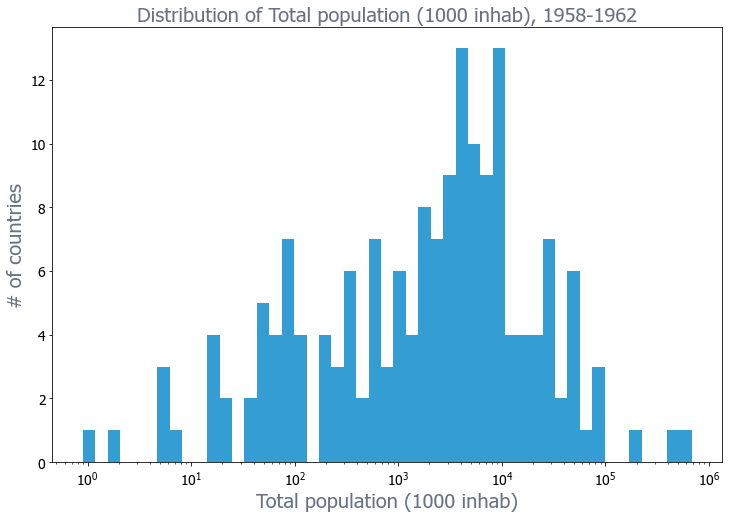

In [20]:
fig, ax = plot_histogram(
    ts,
    variable,
    logx=True,
    xlabel=variable_name,
    title='Distribution of %s, %s' % (variable_name, time_period))

Normal-ish distribution -> yay, better for future modeling

In [21]:
fig.savefig(figplus(dateplus(f'{variable}-{time_period}-histogram.png')))

# % increase in population by country

## Slice data by `total_pop`

In [22]:
def slice_by_variable(df, variable):

    if not isinstance(df, pd.DataFrame):
        raise TypeError("Provided argument `df` is not a Panda's DataFrame object")
        
    df = df[df.variable == variable]
    df = df.pivot(index='country', columns='time_period', values='value')
    return df

In [23]:
total_pop = slice_by_variable(data, 'total_pop')
total_pop.head()

time_period,1958-1962,1963-1967,1968-1972,1973-1977,1978-1982,1983-1987,1988-1992,1993-1997,1998-2002,2003-2007,2008-2012,2013-2017
country,,,,,,,,,,,,
Afghanistan,9344.00,10369.00,11717.00,13056.00,12667.00,11338.00,13746.0,18034.00,21487.00,25878.00,29727.00,32527.00
Albania,1738.00,1999.00,2254.00,2518.00,2788.00,3121.00,3241.0,3092.00,3123.00,3011.00,2881.00,2897.00
Algeria,11690.00,13354.00,15377.00,17690.00,20576.00,23918.00,27181.0,29888.00,31990.00,34262.00,37439.00,39667.00
Andorra,15.38,20.75,26.89,32.77,39.11,48.46,58.9,64.15,71.05,84.88,79.32,70.47
Angola,5466.00,5963.00,6588.00,7501.00,8808.00,10286.00,11849.0,13802.00,16110.00,19184.00,22686.00,25022.00


## Calcuate % increase by country 

Let's calculate relative change in population compared to initial population so we can compare relative change across countries

In [24]:
def calculate_percent_increase(df, return_top=10):

    initial = df.apply(lambda x: x.dropna()[0],axis=1)

    df_minus_initial = df.subtract(initial, axis=0)

    percent_increase = df_minus_initial.divide(initial, axis=0)
    
    if return_top:
        percent_increase = percent_increase.sort_values(by=df.columns[-1], ascending=False)
        percent_increase = percent_increase.head(return_top)
    
    return percent_increase

In [25]:
top_percent_increase = calculate_percent_increase(total_pop)
top_percent_increase

time_period,1958-1962,1963-1967,1968-1972,1973-1977,1978-1982,1983-1987,1988-1992,1993-1997,1998-2002,2003-2007,2008-2012,2013-2017
country,,,,,,,,,,,,
United Arab Emirates,0.0,0.531194,1.888592,5.442068,9.320856,12.538324,16.994652,22.128342,29.249554,52.565062,78.795009,80.613191
Qatar,0.0,0.533369,1.320698,2.246129,3.933262,6.533369,7.715074,8.400249,10.290265,19.982381,34.878270,38.775761
Kuwait,0.0,0.747613,1.585919,2.523270,3.531623,4.721957,4.695107,4.029833,5.091885,6.574582,9.202864,10.610979
Djibouti,0.0,0.394904,0.902335,1.946921,3.083864,4.154989,5.657113,6.278132,6.914013,7.485138,8.056263,8.425690
Bahrain,0.0,0.133449,0.326401,0.751589,1.229925,1.593876,2.020220,2.453495,3.190641,4.932987,6.706528,6.954939
Jordan,0.0,0.371001,0.882011,1.172829,1.558164,2.097216,2.888658,3.720607,4.129830,4.981512,6.264229,6.888450
Oman,0.0,0.140463,0.341396,0.689357,1.228749,1.800622,2.420871,2.849343,3.013476,3.481686,5.124741,6.759157
Saudi Arabia,0.0,0.190924,0.462755,0.901215,1.577813,2.355948,2.987852,3.540454,4.195508,4.978455,5.760486,6.228971
Côte d'Ivoire,0.0,0.227540,0.536898,0.935027,1.406952,1.925134,2.488503,3.089840,3.594920,4.043316,4.642513,5.070053


## Visualize % increase over time for the 10 countries with largest increase in population

In [26]:
def plot_heatmap(df,
                 flip_df=True,
                 percent_data=True,
                 title=None,
                 xlabel=None,
                 ylabel=None,
                 label_size=20,
                 tick_label_size=16,
                 cmap=None,
                 xticklabels=None,
                 yticklabels=None,
                 figsize=None,
                 xrotation=90,
                 yrotation=0,
                 **kwargs):

    if figsize is None:
        figsize = (16, 8)
    
    if xlabel is None:
        xlabel = ' '.join(df.columns.name.split('_')).capitalize()
    if ylabel is None:
        ylabel = ' '.join(df.index.name.split('_')).capitalize()
        
    if cmap is None:
        cmap = sns.cubehelix_palette(30, start=.5, rot=-.75)
    
    if 'cbar_kws' in kwargs:
        cbar_kws = kwargs.pop('cbar_kws')
    else:
        cbar_kws = {}
    
    if percent_data:
        cbar_kws['format'] = '%.0f%%'
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if flip_df:
        # Make top row of heatmap the same as top row of dataframe 
        df = df.iloc[::-1]
    
    ax = sns.heatmap(df, cmap=cmap, cbar_kws=cbar_kws, **kwargs)

    yticklabels = df.index.tolist() if yticklabels is None else yticklabels
    xticklabels = df.columns.tolist() if xticklabels is None else xticklabels
    
    ax.set_xticklabels(xticklabels, rotation=xrotation, size=tick_label_size)
    ax.set_yticklabels(yticklabels, rotation=yrotation, size=tick_label_size)
    
    if title:
        ax.set_title(title, size=label_size)
    
    ax.set_xlabel(xlabel, size=label_size)
    ax.set_ylabel(ylabel, size=label_size)

    ax.set_ylim([0, len(df)])

    return fig, ax

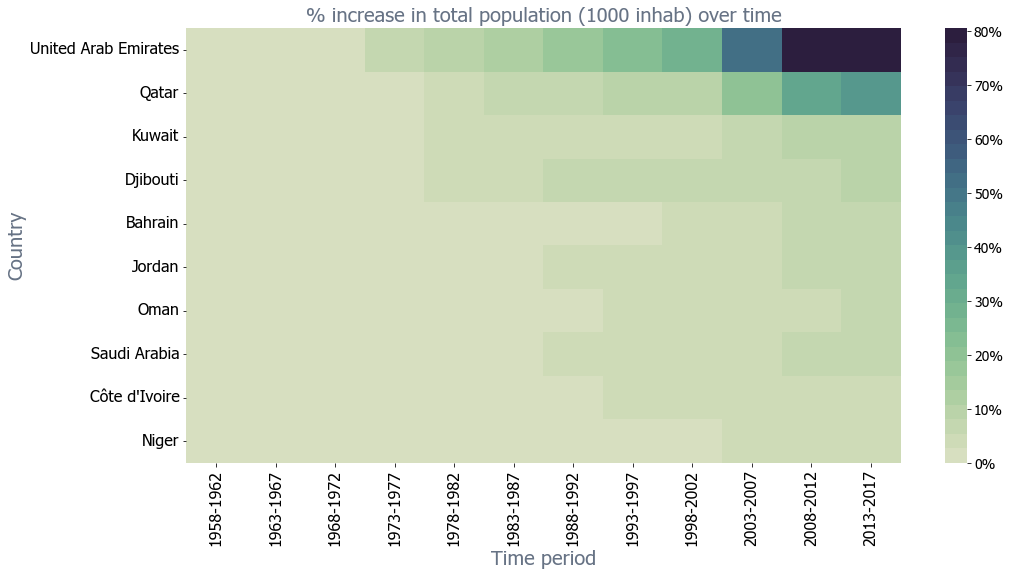

In [27]:
fig2, ax2 = plot_heatmap(
    top_percent_increase,
    percent_data=True,
    title=
    f'% increase in {variable_name.lower()} over time'
)

In [28]:
fig2.savefig(figplus(dateplus(f'top-10-countries-percent-change-{variable}-over-time.png')))

# Appendix

In [30]:
# #! pip install watermark
# %load_ext watermark
# %watermark -v -m --iversions -g

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 7.30.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit

Git hash: 274764560e7f9d4bb06e2483dd29e1da14805fe0

sys       : 3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:21:17) 
[Clang 11.1.0 ]
numpy     : 1.21.4
pandas    : 1.3.4
json      : 2.0.9
matplotlib: 3.5.0
seaborn   : 0.11.2

